In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


## 1. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [6]:
data["distance"]=data["distance"].str.replace(',', '.')
data["consume"]=data["consume"].str.replace(',', '.')
data["temp_inside"]=data["temp_inside"].str.replace(',', '.')
data["refill liters"]=data["refill liters"].str.replace(',', '.')

In [7]:
data["distance"]=data["distance"].astype(np.float)
data["consume"]=data["consume"].astype(np.float)
data["temp_inside"]=data["temp_inside"].astype(np.float)
data["refill liters"]=data["refill liters"].astype(np.float)

data["temp_inside"]=data["temp_inside"].fillna(np.mean(data["temp_inside"]))

In [8]:
data.isnull().sum()/len(data)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.000000
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [9]:
data = data.drop(columns=['refill liters','refill gas','specials'])

- SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol).
- E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [10]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [11]:
# Unitary price

data['unitary_price'] = data['gas_type'].map({'E10': 1.38, 'SP98': 1.46})
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,unitary_price
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.38
1,12.0,4.2,30,21.5,13,E10,0,0,0,1.38
2,11.2,5.5,38,21.5,15,E10,0,0,0,1.38
3,12.9,3.9,36,21.5,14,E10,0,0,0,1.38
4,18.5,4.5,46,21.5,15,E10,0,0,0,1.38
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,1.46
384,16.1,4.3,38,25.0,31,SP98,1,0,0,1.46
385,16.0,3.8,45,25.0,19,SP98,0,0,0,1.46
386,15.4,4.6,42,25.0,31,SP98,1,0,0,1.46


In [12]:
# Total price ($L/100km)

data['total_price'] = data['consume']*data['unitary_price']
data['total_price'] = data['total_price'].round(2)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,unitary_price,total_price
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.38,6.90
1,12.0,4.2,30,21.5,13,E10,0,0,0,1.38,5.80
2,11.2,5.5,38,21.5,15,E10,0,0,0,1.38,7.59
3,12.9,3.9,36,21.5,14,E10,0,0,0,1.38,5.38
4,18.5,4.5,46,21.5,15,E10,0,0,0,1.38,6.21
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,1.46,5.40
384,16.1,4.3,38,25.0,31,SP98,1,0,0,1.46,6.28
385,16.0,3.8,45,25.0,19,SP98,0,0,0,1.46,5.55
386,15.4,4.6,42,25.0,31,SP98,1,0,0,1.46,6.72


## 2. Visualization

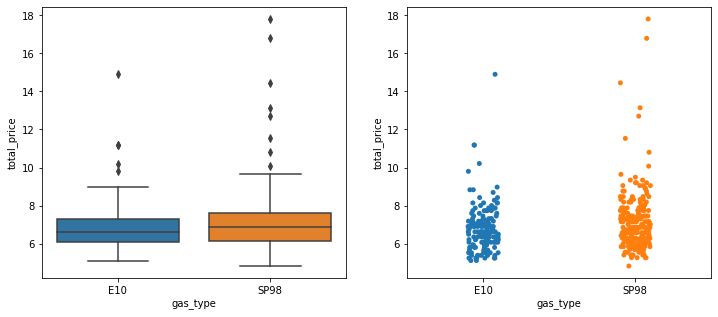

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x=data.gas_type, y=data.total_price, ax=ax[0])

sns.stripplot(x=data.gas_type, y=data.total_price, ax=ax[1])

plt.show()

- E10 fuel consumes a litte more than SP98, but the later has more extreme values.

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

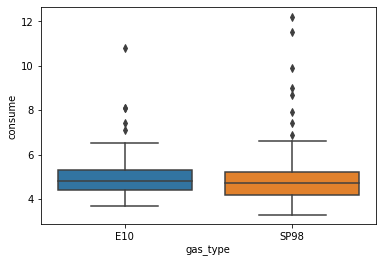

In [13]:
sns.boxplot(x=data.gas_type,y=data.consume)

- Prices per km in SP98 are higher and with more extreme values.

In [18]:
data.groupby("gas_type")["distance"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,21.096250,15.40,1.7,130.3
SP98,18.639912,14.15,1.3,216.1


In [16]:
data.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,4.931250,4.8,3.7,10.8
SP98,4.899123,4.7,3.3,12.2


In [36]:
data.groupby("gas_type")["speed"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,43.506250,42.0,14,88
SP98,40.820175,39.5,16,90


In [17]:
data.groupby("gas_type")["total_price"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,6.805000,6.62,5.11,14.90
SP98,7.152895,6.86,4.82,17.81


In [22]:
e10 =  data[data["gas_type"] == "E10"]
sp98 = data[data["gas_type"] == "SP98"]

In [28]:
# Ratio between distance / consume provides for each gas_type
m_e10_dc = e10["distance"].mean()/e10["consume"].mean()
m_sp98_dc = sp98["distance"].mean()/sp98["consume"].mean()

In [29]:
ratio_sp98_e10 = 1- (m_sp98_dc/m_e10_dc)
ratio_sp98_e10

0.11064060897931771

1. E10:

- Mean distance = 21.09 km
- Mean consumption = 4.93 l/100
- Mean speed = 43.51 km/h
- Mean total_price = 6.80 $/100

2. SP98:

- Mean distance = 18.6 km
- Mean consumption = 4.89 l/100
- Mean speed = 40.82 km/h
- Mean total_price = 7.15 $/100

**Overall, SP98 seems to be better as provides with lower mean consumption (11%).**

In [35]:
data.pivot_table(index= ['gas_type', 'AC'],aggfunc = {'consume':'mean'})

consume
gas_type AC          
E10      0   4.922876
         1   5.114286
SP98     0   4.854146
         1   5.300000

Text(0.5, 1.0, 'AC1: gas_type & consume')

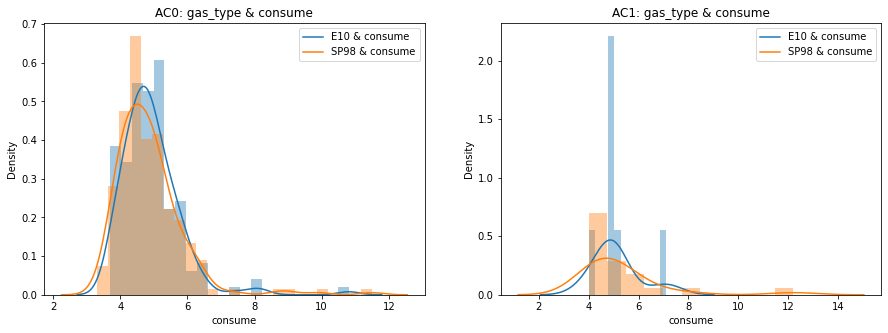

In [43]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(data[(data.AC==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.AC==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(data[(data.AC==1)&(data.gas_type=="E10")].consume,ax=ax2)
sns.distplot(data[(data.AC==1)&(data.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC1: gas_type & consume")

- When AC is on, the amount of E10 data is too limited, so it is hard to compare between gas types.
- When AC is on or off, E10 looks both consume more than SP98.

In [34]:
data.pivot_table(index= ['gas_type', 'rain'],aggfunc = {'consume':'mean'})

consume
gas_type rain          
E10      0     4.856944
         1     5.600000
SP98     0     4.786224
         1     5.590625

Text(0.5, 1.0, 'rain1: gas_type & consume')

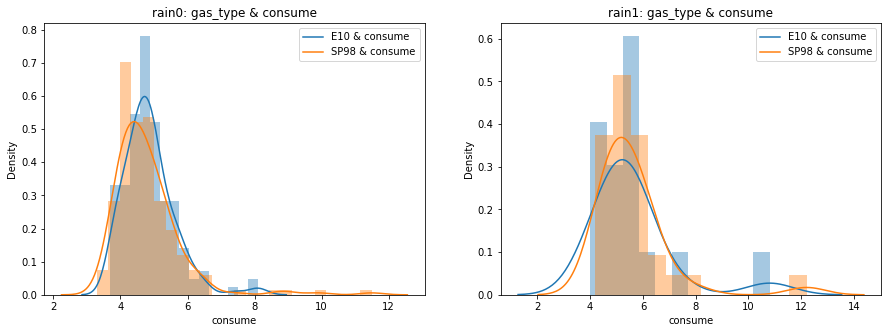

In [44]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(data[(data.rain==1)&(data.gas_type=="E10")].consume,ax=ax2)
sns.distplot(data[(data.rain==1)&(data.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain1: gas_type & consume")

- When it's rain, two type of gas:
1. When rains, both type of gas looks consume more
2. Whenever rain or not, E10 consume bit more than SP98.

In [33]:
data.pivot_table(index= ['gas_type', 'sun'],aggfunc = {'consume':'mean'})

consume
gas_type sun          
E10      0    4.972297
         1    4.425000
SP98     0    4.960096
         1    4.265000

Text(0.5, 1.0, 'sun1: gas_type & consume')

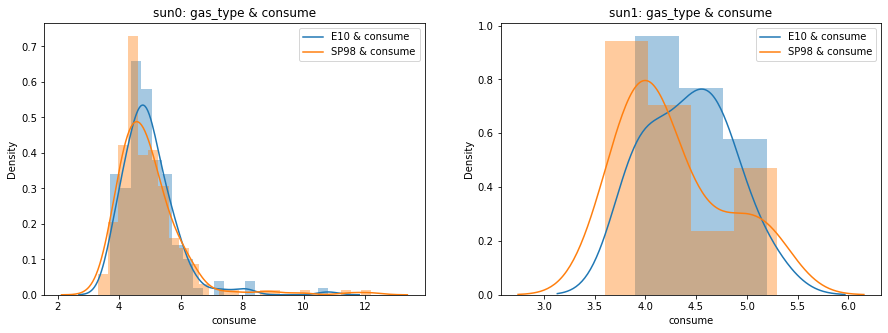

In [45]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(data[(data.sun==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.sun==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("sun0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(data[(data.sun==1)&(data.gas_type=="E10")].consume,ax=ax2)
sns.distplot(data[(data.sun==1)&(data.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("sun1: gas_type & consume")

- When it's sunny, car consume less and the data is more concentrated. E10 gas still consumes a litte more when it is sunny.

**Correlation Matrix**

In [23]:
def correlation_heatmap(data):
    correlations = data.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

#### E10

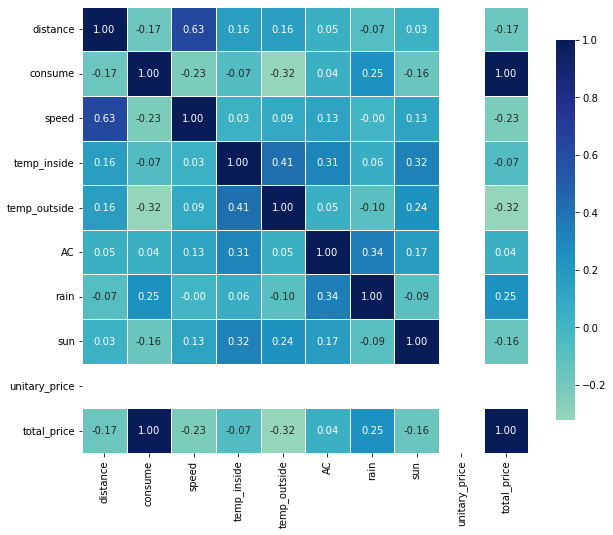

In [24]:
correlation_heatmap(e10)

In [37]:
#from pandas_profiling import ProfileReport
#import pandas_profiling as pdp

In [38]:
#profile = ProfileReport(e10, title='Pandas Profiling Report', minimal=True,progress_bar=False,      
    #missing_diagrams={
          #'heatmap': False,
          #'dendrogram': False,
      #} )
#profile

#### SP98

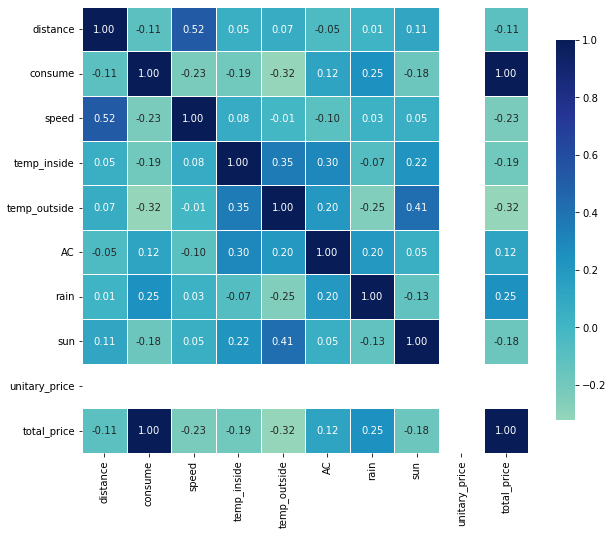

In [29]:
correlation_heatmap(sp98)

## 3. Prediction

In [46]:
# Adding actual litre consumption

e10["litre"] = (e10["distance"]*e10["consume"])/100
sp98["litre"] = (sp98["distance"]*sp98["consume"])/100

In [62]:
# To know the consumption based on the distance for each of the gas_types, using a linear regression approach.

### E10

In [49]:
X =  pd.DataFrame(e10["distance"])
y =  e10["litre"]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [51]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()  

In [53]:
X_train= sc_X.fit_transform(X_train)  
X_test =sc_X.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [55]:
regressor.coef_

array([0.97807675])

In [56]:
regressor.intercept_

1.0230796875

In [57]:
#Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.9858020733149551
 Score of Test : 0.985551361015392


In [58]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [59]:
# Model Validation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2_train:",r2_train)
print("r2_test:",r2_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("rmse_train:", rmse_train)
print("rmse_test:", rmse_test)

r2_train: 0.9858020733149551
r2_test: 0.985551361015392
rmse_train: 0.11737903540200448
rmse_test: 0.09792457027831915


In [60]:
y_pred = regressor.predict(X_test)

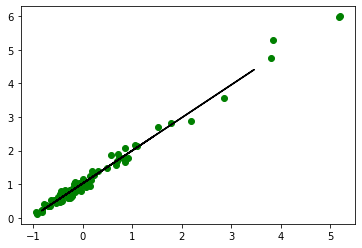

In [61]:
plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 


plt.show()

### SP98

In [63]:
Xs =  pd.DataFrame(sp98["distance"])
ys =  sp98["litre"]

In [64]:
X_trains,X_tests,y_trains,y_tests = train_test_split(Xs,ys,test_size = 0.2,random_state=0)

In [65]:
X_trains = np.array(X_trains).reshape(-1,1)
X_tests = np.array(X_tests).reshape(-1,1)

In [66]:
sc_X=StandardScaler() 

In [67]:
X_trains= sc_X.fit_transform(X_trains)  
X_tests =sc_X.transform(X_tests)

In [68]:
regressors = LinearRegression()
regressors.fit(X_trains,y_trains)

LinearRegression()

In [69]:
regressors.coef_

array([1.32452617])

In [70]:
regressors.intercept_

0.9163549450549447

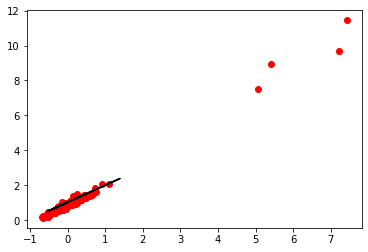

In [71]:
y_preds = regressor.predict(X_tests)
plt.scatter(X_trains, y_trains,color='r') 

plt.plot(X_tests, y_preds,color='k') 


plt.show()